In [3]:

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import tensorflow as tf
     

In [ ]:
#Data Preparation

In [4]:
tf.random.set_seed(0)
np.random.seed(0)


sample_size = 500
batch_size = 10
sigma_e = 3.0             # true value of parameter error sigma
xs = 100 * np.random.rand(sample_size)
es = np.random.normal(0, sigma_e, sample_size)
ys = 1.0 + 2.0 * xs + es

ds = tf.data.Dataset.from_tensor_slices((xs, ys)).shuffle(buffer_size=sample_size).batch(batch_size)
for x, y in ds.take(1):         # take first batch
    print(x, y)
     

tf.Tensor(
[94.53015335 42.40889884 42.40322519 84.90383084 43.44166256  2.01075462
 55.20782767 40.71832972 49.04588086 10.20448107], shape=(10,), dtype=float64) tf.Tensor(
[189.93610426  85.85229439  84.8538211  170.60625922  86.47141214
   3.74855637 115.39504027  81.28272318  97.11208653  21.64374268], shape=(10,), dtype=float64)


2026-02-02 21:29:05.441844: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
#1. Low-Level Implementation

#The convergence depends on initial states of w and b, batch_size, learning rate, and loss function (mse or rmse), etc.

SyntaxError: invalid syntax (2484932595.py, line 3)

In [6]:
w = tf.Variable(tf.random.normal(shape=[1], dtype=tf.float64))      # scaler, shape=[] or shape=[1,]
b = tf.Variable(0,  dtype = tf.float64)          # scaler

epochs = 100
learning_rate = 0.001
ws = []
bs = []
for epoch in tf.range(1,epochs+1):      # for each epoch
  for x, y in ds:           # for each batch
    with tf.GradientTape() as tape:
      y_bar = x*w + b                    # broadcasting
      loss = tf.sqrt(tf.reduce_mean( (y-y_bar)**2 ))
      # loss = tf.reduce_mean( (y-y_bar)**2 )
    # Back propagation to calculate gradient
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
    # apply_gradients
    w.assign(w - learning_rate * dloss_dw)         # assign, keeps tf.Variable; operator ==> tf.Tensor
    b.assign(b - learning_rate * dloss_db)
    ws.append(w.numpy()[0])
    bs.append(b.numpy())

  if epoch % 20 == 0:
    tf.print('w=', w[0], ' ,b=', b, ' ,mse=', loss)

2026-02-02 21:30:03.065557: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2026-02-02 21:30:03.145198: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2026-02-02 21:30:03.300873: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


w= 2.0092433160037424  ,b= 0.083804579058864792  ,mse= 2.5152901410985193


2026-02-02 21:30:03.611531: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2026-02-02 21:30:04.231123: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


w= 2.0133854164832647  ,b= 0.12503606117564978  ,mse= 3.4116469321528675
w= 1.9745402878296359  ,b= 0.16570829832847597  ,mse= 2.181400506321292


2026-02-02 21:30:05.470282: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


w= 2.0332908978757693  ,b= 0.2049263327697792  ,mse= 1.9839655160821144
w= 1.9998285047327671  ,b= 0.2377451301309072  ,mse= 4.39657509939333


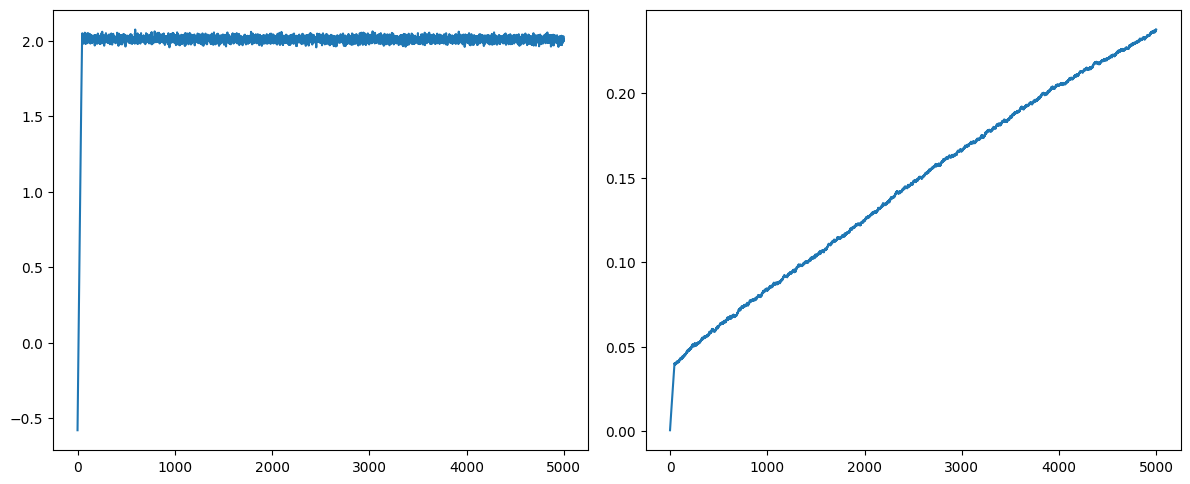

In [7]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.tight_layout()
axes[0].plot(ws)
axes[1].plot(bs)

In [ ]:
#2. High-Level Implementation

In [8]:
	

tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape =(1,)))        # total param # = 2
model.summary()

/opt/miniconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['rmse']
)

In [ ]:
#We can either mix it with low-level api

In [15]:
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


with tf.GradientTape() as tape:
    y_bar = model(y)
    loss = loss_fn(tf.reshape(y, [-1]), tf.reshape(y_bar, [-1]))
grads = tape.gradient(loss, model.variables)

In [16]:

epochs = 200

for epoch in tf.range(1,epochs+1):      # for each epoch
  loss = tf.constant(0.0)
  for x, y in ds:           # for each batch
    with tf.GradientTape() as tape:
      y_bar = model(y)                # __call__
      loss = loss_fn(tf.reshape(y, [-1]), tf.reshape(y_bar, [-1]))
    # Back propagation to calculate gradient
    grads = tape.gradient(loss, model.variables)
    # apply_gradients
    model.optimizer.apply_gradients(zip(grads, model.variables))
  
  if epoch%20==0:
    tf.print('w=', w, ' ,b=', b, ' ,mse=', loss)

w= [1.9998285047327671]  ,b= 0.2377451301309072  ,mse= 0.0383370481


2026-02-02 21:35:01.227478: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


w= [1.9998285047327671]  ,b= 0.2377451301309072  ,mse= 0.0151229426
w= [1.9998285047327671]  ,b= 0.2377451301309072  ,mse= 0.0168041941
w= [1.9998285047327671]  ,b= 0.2377451301309072  ,mse= 0.0124352574
w= [1.9998285047327671]  ,b= 0.2377451301309072  ,mse= 0.0128080379
w= [1.9998285047327671]  ,b= 0.2377451301309072  ,mse= 0.00583618414
w= [1.9998285047327671]  ,b= 0.2377451301309072  ,mse= 0.00319466414


2026-02-02 21:35:23.587400: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


w= [1.9998285047327671]  ,b= 0.2377451301309072  ,mse= 0.000665781437
w= [1.9998285047327671]  ,b= 0.2377451301309072  ,mse= 3.39751132e-05
w= [1.9998285047327671]  ,b= 0.2377451301309072  ,mse= 7.89310604e-07


In [ ]:
#Or just call model.fit

In [23]:
tf.keras.backend.clear_session()

# Recreate the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile without rmse
model.compile(
    optimizer='adam',
    loss='mse'
)

# training
model.fit(tf.convert_to_tensor(xs), tf.convert_to_tensor(ys), batch_size=10, epochs=200, verbose=0) 

# display the weigh
tf.print('w=', model.layers[0].kernel, ' b=', model.layers[0].bias)

w= [[1.97652054]]  b= [2.2876668]
